In [2]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_mirror
from automation import optimize_image_plane, optimize_many_shapes
from importlib import reload
import asyncio

In [5]:
obj = ElecLens("/home/trh/data/mirror/base/curvedspacedmir5elec02_retracing.dat",verbose=True)
obj.mirror_type(mirror=True,curved_mirror=True)
obj.write("/home/trh/data/mirror/base/curvedspacedmir5elec02_ret_test.dat")
col = OpticalColumn(obj)
# obj01.coil_curr=[800]
col.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest_test00.dat",
                            turning_point=5,source_pos=97.116,img_pos=97.116074,
                            potentials=MirPotentials(obj,[-500,6267.42,37843.6,30450.1,200000],['f','v1','f','f','f']))
# obj.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(obj,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# obj.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(obj,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# obj.calc_rays()
# obj.mircondbasename_noext = "m1"
obj.calc_field()
calc_properties_mirror(obj,col)

Reading file /home/trh/data/mirror/base/curvedspacedmir5elec02_retracing.dat 
with title: mirror3.dat - test mirror 3
Warning! This data file seems to have curvature coordinates. Setting so=True.


     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************

In [6]:
col.read_mir_optical_properties(raytrace=True)



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
                With Rotational (

In [7]:
col.c3

4.056578406659954

Reading file /home/trh/data/mirror/base/curvedspacedmir4elec01_bigger_box_tweaked.dat 
with title: four-electrode mirror
Warning! This data file seems to have curvature coordinates. Setting so=True.


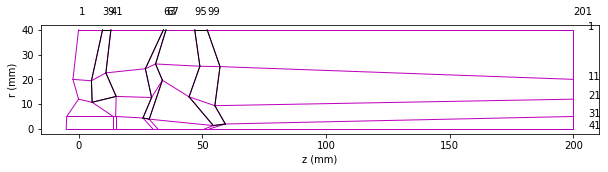



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


       SOELENS Module    For Computing Potential Distribution
       ---------------   ------------------------------------
                         of Electrostatic Lenses
                    

In [22]:
obj2 = ElecLens("/home/trh/data/mirror/base/curvedspacedmir4elec01_bigger_box_tweaked.dat",verbose=True)
obj2.mirror_type(mirror=True,curved_mirror=True)
obj2.write("/home/trh/data/mirror/base/curvedspacedmir4elec01_bigger_box_tweaked_test.dat")
col2 = OpticalColumn(obj2)
# obj201.coil_curr=[800]
col2.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest_test01.dat",
                            turning_point=5,source_pos=70,img_pos=75,
                            potentials=ElecLens.MirPotentials(obj2,[-500,10000,100000,200000],['f','v1','v2','f']))
# obj2.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(obj2,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# obj2.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(obj2,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# obj2.calc_rays()
# obj2.mircondbasename_noext = "m1"
obj2.calc_field()
calc_properties_mirror(obj2,col2)

In [23]:
col2.read_mir_optical_properties(raytrace=True)



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
                With Rotational (

In [24]:
col.c3

46.8377672303136